In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set visual style
sns.set(style="whitegrid")

In [3]:
# Load dataset
file_path = "AB_NYC_2019.csv"
df = pd.read_csv(file_path)

In [4]:
# Display initial data information
print("Initial Data Information:")
print(df.info())
print("\nInitial Data Description:")
print(df.describe())

Initial Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_r

In [5]:
# 1. Handling Missing Values
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())


Missing Values Before Cleaning:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [6]:
# Fill missing values in 'last_review' with 'No Reviews' and in 'reviews_per_month' with 0
df['last_review'].fillna('No Reviews', inplace=True)
df['reviews_per_month'].fillna(0, inplace=True)

In [7]:
# For 'availability_365', fill missing with the mean (if applicable)
df['availability_365'].fillna(df['availability_365'].mean(), inplace=True)

In [8]:
# 2. Removing Duplicates
print("\nDuplicate Rows Before Removing:")
print(df.duplicated().sum())


Duplicate Rows Before Removing:
0


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
print("Duplicate Rows After Removing:")
print(df.duplicated().sum())

Duplicate Rows After Removing:
0


In [11]:
# 3. Correcting Data Types
# Convert 'price' to numeric (in case it was read as a string)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [12]:
# Convert 'minimum_nights' to integer
df['minimum_nights'] = df['minimum_nights'].astype(int)

In [13]:
# Check data types after conversion
print("\nData Types After Conversion:")
print(df.dtypes)




Data Types After Conversion:
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int32
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [14]:
# 4. Handling Outliers
# For 'price', let's use the 99.5 percentile as a threshold to remove outliers
price_threshold = df['price'].quantile(0.995)
df = df[df['price'] <= price_threshold]

print(f"\nNumber of Rows After Outlier Removal (Price > {price_threshold}): {len(df)}")


Number of Rows After Outlier Removal (Price > 1000.0): 48656


In [15]:
# 5. Renaming Columns for Consistency
df.rename(columns={
    'host_id': 'HostID',
    'host_name': 'HostName',
    'neighbourhood_group': 'NeighbourhoodGroup',
    'neighbourhood': 'Neighbourhood',
    'room_type': 'RoomType'
}, inplace=True)

In [16]:
# 6. Resetting Index
df.reset_index(drop=True, inplace=True)

In [17]:
# Final data summary
print("\nFinal Data Information:")
print(df.info())


Final Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48656 entries, 0 to 48655
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48656 non-null  int64  
 1   name                            48640 non-null  object 
 2   HostID                          48656 non-null  int64  
 3   HostName                        48635 non-null  object 
 4   NeighbourhoodGroup              48656 non-null  object 
 5   Neighbourhood                   48656 non-null  object 
 6   latitude                        48656 non-null  float64
 7   longitude                       48656 non-null  float64
 8   RoomType                        48656 non-null  object 
 9   price                           48656 non-null  int64  
 10  minimum_nights                  48656 non-null  int32  
 11  number_of_reviews               48656 non-null  int64  
 12  last_re

In [18]:
print("\nFinal Data Description:")
print(df.describe())


Final Data Description:
                 id        HostID      latitude     longitude         price  \
count  4.865600e+04  4.865600e+04  48656.000000  48656.000000  48656.000000   
mean   1.901705e+07  6.761238e+07     40.728934    -73.952046    141.279842   
std    1.097870e+07  7.859467e+07      0.054568      0.046165    116.737468   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.475115e+06  7.829861e+06     40.690020    -73.982970     69.000000   
50%    1.967574e+07  3.081249e+07     40.722970    -73.955590    105.000000   
75%    2.913608e+07  1.074344e+08     40.763130    -73.936117    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990   1000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48656.000000       48656.000000       48656.000000   
mean         6.973549          23.357304           1.094671   
std         20.265616          44.630417           1.599479   
min        

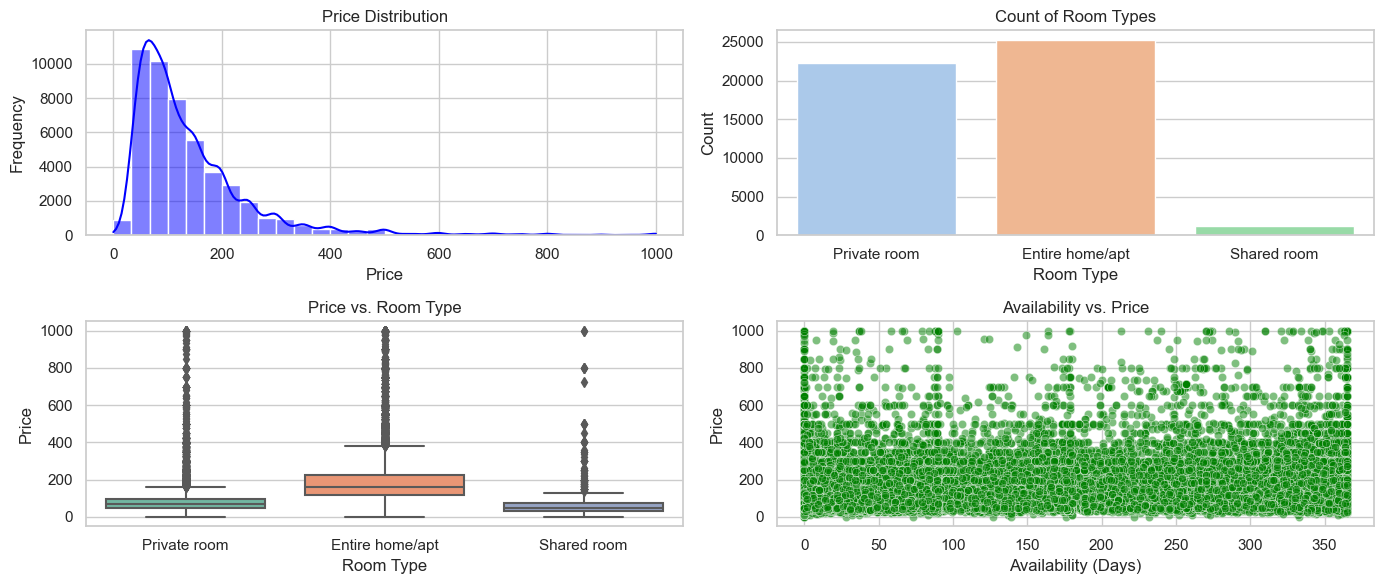

In [19]:
# Visualizations
plt.figure(figsize=(14, 6))

# 1. Price Distribution
plt.subplot(2, 2, 1)
sns.histplot(df['price'], bins=30, kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# 2. Count of Room Types
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='RoomType', palette='pastel')
plt.title('Count of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')

# 3. Price vs. Room Type
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='RoomType', y='price', palette='Set2')
plt.title('Price vs. Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')

# 4. Availability vs. Price
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='availability_365', y='price', alpha=0.5, color='green')
plt.title('Availability vs. Price')
plt.xlabel('Availability (Days)')
plt.ylabel('Price')

plt.tight_layout()
plt.show()